In [156]:
import ribopy

import matplotlib

from matplotlib import pyplot as plt

from ribopy.core.get_gadgets import get_region_boundaries

import pandas as pd
import numpy as np

from functools import partial

%matplotlib inline

In [218]:
LENGTH_MIN = 29
LENGTH_MAX = 35

In [36]:
ribo_file = "../../mouse-itp_v1.ribo"
myribo    = ribopy.Ribo(ribo_file, alias=ribopy.api.alias.apris_human_alias) 

In [13]:
cross_exps = myribo.experiments[15:]
cross_exps

('20210513-ITP-1cell-cross-50-A',
 '20210513-ITP-1cell-cross-50-B',
 '20210513-ITP-1cell-cross-50-C',
 '20210513-ITP-1cell-cross-50-D',
 '20210513-ITP-1cell-cross-50-E',
 '20210513-ITP-2cell-cross-50-B',
 '20210513-ITP-2cell-cross-50-C',
 '20210513-ITP-2cell-cross-50-F',
 '20210513-ITP-4cell-cross-50-B',
 '20210513-ITP-4cell-cross-50-C',
 '20210513-ITP-4cell-cross-50-D',
 '20210513-ITP-8cell-cross-50-A',
 '20210513-ITP-8cell-cross-50-B',
 '20210513-ITP-8cell-cross-50-C',
 '20210513-ITP-8cell-cross-50-D')

In [68]:


cds_total_region_counts = myribo.get_region_counts(experiments    = cross_exps,
                              region_name    = "CDS",
                              range_lower    = 27,
                              range_upper    = 36,
                              sum_lengths    = True,
                              sum_references = True)

cds_total_region_counts

,20210513-ITP-1cell-cross-50-A,20210513-ITP-1cell-cross-50-B,20210513-ITP-1cell-cross-50-C,20210513-ITP-1cell-cross-50-D,20210513-ITP-1cell-cross-50-E,20210513-ITP-2cell-cross-50-B,20210513-ITP-2cell-cross-50-C,20210513-ITP-2cell-cross-50-F,20210513-ITP-4cell-cross-50-B,20210513-ITP-4cell-cross-50-C,20210513-ITP-4cell-cross-50-D,20210513-ITP-8cell-cross-50-A,20210513-ITP-8cell-cross-50-B,20210513-ITP-8cell-cross-50-C,20210513-ITP-8cell-cross-50-D
0,48536,67748,36142,45798,50037,69699,35554,46736,47696,41739,71299,62015,112388,79150,66378


In [70]:
utr3_trans_total_region_counts = myribo.get_region_counts(experiments    = cross_exps,
                              region_name    = "UTR3",
                              range_lower    = 27,
                              range_upper    = 36,
                              alias=True,                            
                              sum_lengths    = True,
                              sum_references = False)

In [41]:
utr3_trans_total_region_counts

,20210513-ITP-1cell-cross-50-A,20210513-ITP-1cell-cross-50-B,20210513-ITP-1cell-cross-50-C,20210513-ITP-1cell-cross-50-D,20210513-ITP-1cell-cross-50-E,20210513-ITP-2cell-cross-50-B,20210513-ITP-2cell-cross-50-C,20210513-ITP-2cell-cross-50-F,20210513-ITP-4cell-cross-50-B,20210513-ITP-4cell-cross-50-C,20210513-ITP-4cell-cross-50-D,20210513-ITP-8cell-cross-50-A,20210513-ITP-8cell-cross-50-B,20210513-ITP-8cell-cross-50-C,20210513-ITP-8cell-cross-50-D
transcript,,,,,,,,,,,,,,,
Xkr4-201,0,0,0,1,0,0,1,0,3,3,1,0,0,0,1
Rp1-202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sox17-201,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Mrpl15-206,2,2,1,0,4,4,7,5,4,11,4,2,3,0,2
Lypla1-201,1,0,2,2,2,3,3,0,5,0,7,0,7,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Atp6-201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mt-Nd3-201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mt-Nd4l-201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']

x1 = list(utr3_trans_total_region_counts["20210513-ITP-1cell-cross-50-A"])

names = ["20210513-ITP-1cell-cross-50-A", "20210513-ITP-1cell-cross-50-B"]

Text(0.5, 1.0, '20210513-ITP-1cell-cross-50-A')

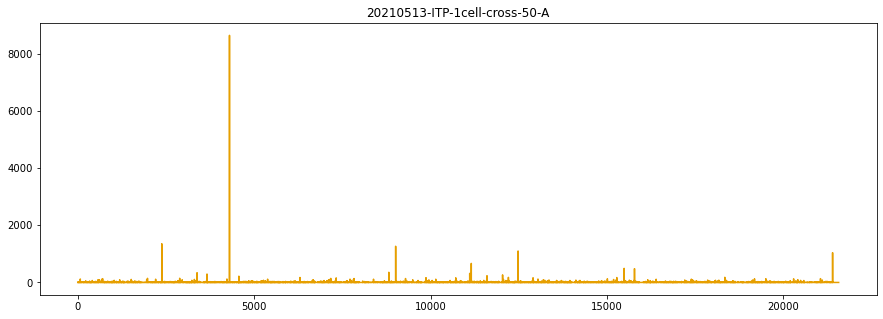

In [47]:
plt.rcParams['figure.figsize'] = [15, 5]

plt.plot(x1, color = colors[0]);
plt.title("20210513-ITP-1cell-cross-50-A")

We see 1 major peak and 4 other peaks. To see, them, we filter reads above 1000.

In [42]:
utr3_trans_total_region_counts["20210513-ITP-1cell-cross-50-A"][ utr3_trans_total_region_counts["20210513-ITP-1cell-cross-50-A"] > 1000 ]

transcript
Sppl2a-201        1353
Tmem38b-201       8637
Olfr624-201       1265
D10Wsu102e-201    1100
Kdm5d-201         1040
Name: 20210513-ITP-1cell-cross-50-A, dtype: uint32

Text(0.5, 1.0, '20210513-ITP-1cell-cross-50-A')

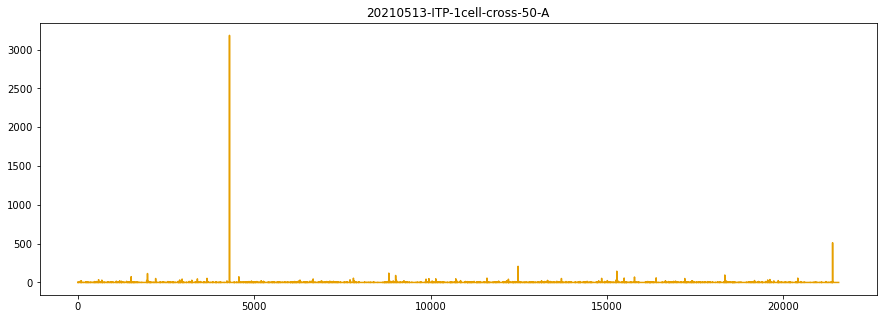

In [71]:
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']

x1 = list(utr3_trans_total_region_counts["20210513-ITP-1cell-cross-50-A"])

names = ["20210513-ITP-1cell-cross-50-A", "20210513-ITP-1cell-cross-50-B"]


plt.rcParams['figure.figsize'] = [15, 5]

plt.plot(x1, color = colors[0]);
plt.title("20210513-ITP-1cell-cross-50-A")



In [72]:
utr3_trans_total_region_counts["20210513-ITP-1cell-cross-50-A"][ utr3_trans_total_region_counts["20210513-ITP-1cell-cross-50-A"] > 250 ]

transcript
Tmem38b-201    3185
Kdm5d-201       512
Name: 20210513-ITP-1cell-cross-50-A, dtype: uint32

Let's see if these genes behave the same in other experiments.

Text(0.5, 1.0, '20210513-ITP-2cell-cross-50-B')

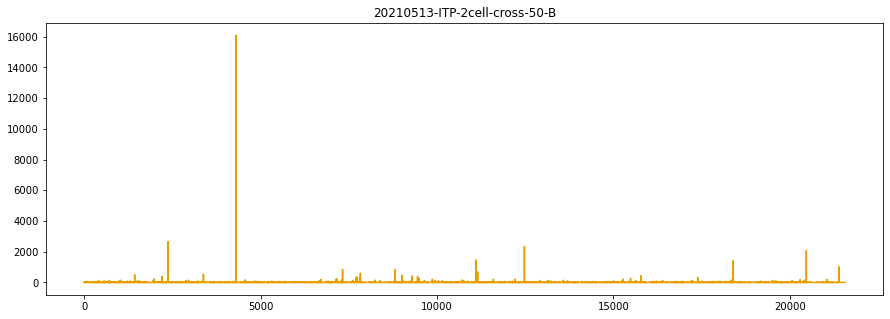

In [56]:
#fig, axs = plt.subplots(1,15)
exp_name = "20210513-ITP-2cell-cross-50-B"
utr3_counts = list(utr3_trans_total_region_counts[exp_name])

plt.plot(utr3_counts, color = colors[0]);
plt.title(exp_name)

Text(0.5, 1.0, '20210513-ITP-4cell-cross-50-B')

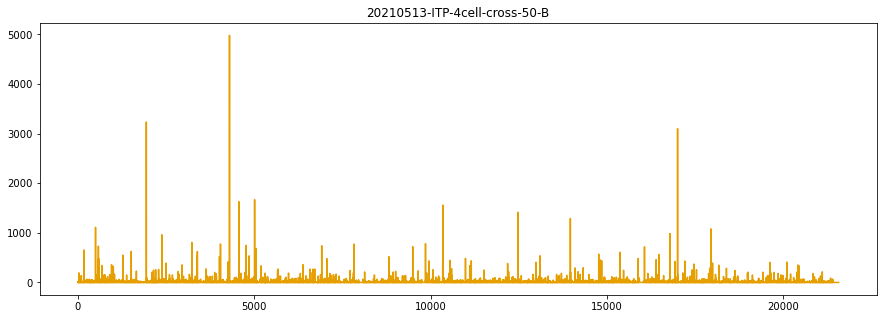

In [57]:
#fig, axs = plt.subplots(1,15)
exp_name = "20210513-ITP-4cell-cross-50-B"
utr3_counts = list(utr3_trans_total_region_counts[exp_name])

plt.plot(utr3_counts, color = colors[0]);
plt.title(exp_name)

## 8 Cells

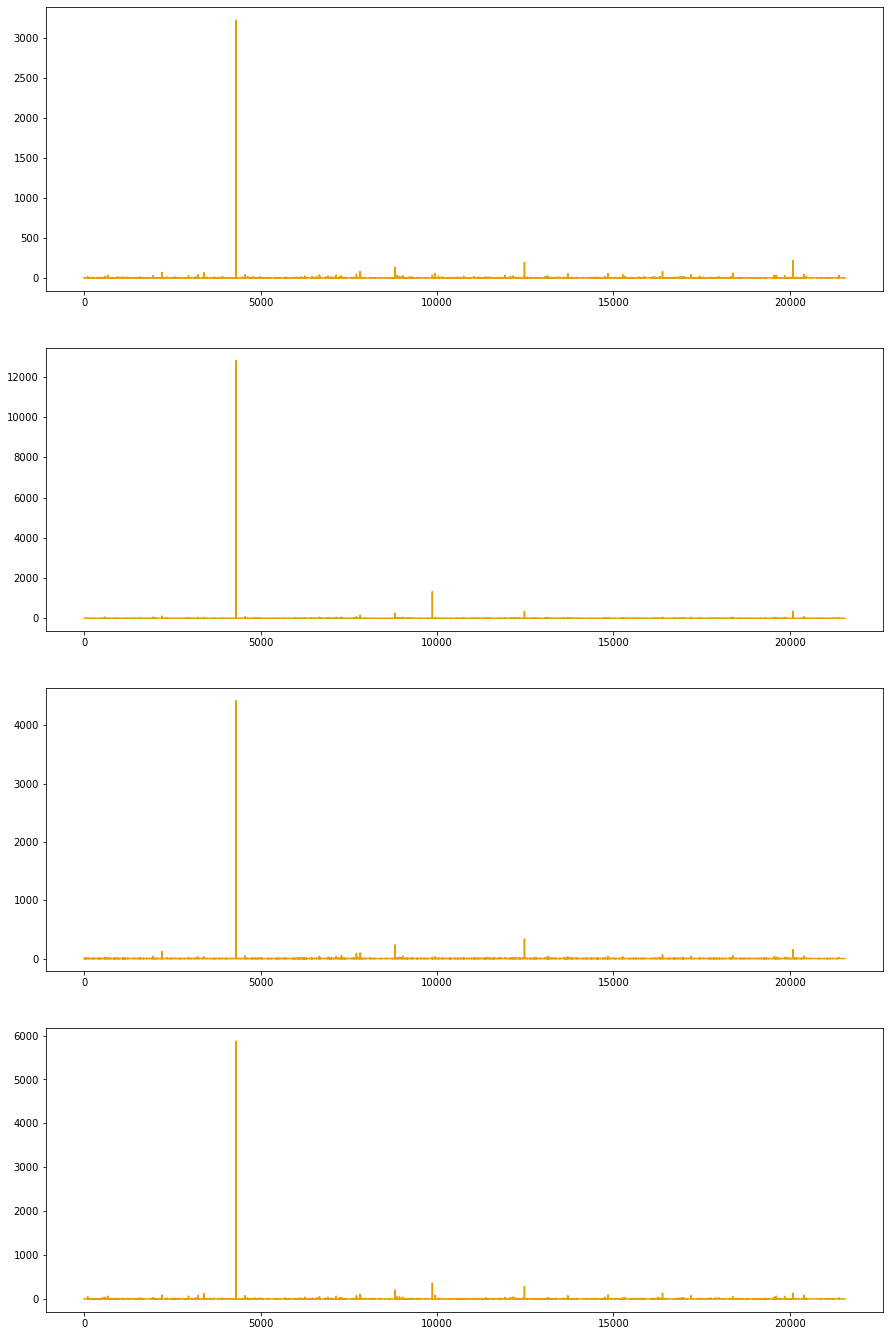

In [73]:
#fig, axs = plt.subplots(1,4)
plt.rcParams['figure.figsize'] = [15, 24]

fig, ax = plt.subplots(4, 1)


eight_names= ['20210513-ITP-8cell-cross-50-A', '20210513-ITP-8cell-cross-50-B',
              '20210513-ITP-8cell-cross-50-C', '20210513-ITP-8cell-cross-50-D']

for i, exp_name in enumerate(eight_names):
    
    utr3_counts = list(utr3_trans_total_region_counts[exp_name])

    ax[i].plot(utr3_counts, color = colors[0]);
    #ax[i].title(exp_name)

### Outlier Genes

In [75]:
for i, exp_name in enumerate(eight_names):
    
    utr3_counts = list(utr3_trans_total_region_counts[exp_name])
    
    f_df = utr3_trans_total_region_counts[exp_name][ utr3_trans_total_region_counts[exp_name] > 100 ]
    
    print(f_df)

transcript
Tmem38b-201       3222
Vmn2r79-201        133
D10Wsu102e-201     195
Olfr1459-202       219
Name: 20210513-ITP-8cell-cross-50-A, dtype: uint32
transcript
Olfr1307-201        112
Tmem38b-201       12821
Vmn1r81-203         107
Rnf225-201          152
Vmn2r79-201         242
Fnta-201           1321
D10Wsu102e-201      338
Olfr1459-202        348
Name: 20210513-ITP-8cell-cross-50-B, dtype: uint32
transcript
Olfr1307-201       122
Tmem38b-201       4421
Vmn2r79-201        236
D10Wsu102e-201     336
Olfr1459-202       152
Name: 20210513-ITP-8cell-cross-50-C, dtype: uint32
transcript
Syt11-203          122
Tmem38b-201       5875
Vmn1r81-203        102
Vmn2r79-201        199
Fnta-201           359
D10Wsu102e-201     286
Rpgrip1-202        133
Olfr1459-202       130
Name: 20210513-ITP-8cell-cross-50-D, dtype: uint32


In [60]:
for e, i in enumerate(cross_exps):
    print(e,i)

0 20210513-ITP-1cell-cross-50-A
1 20210513-ITP-1cell-cross-50-B
2 20210513-ITP-1cell-cross-50-C
3 20210513-ITP-1cell-cross-50-D
4 20210513-ITP-1cell-cross-50-E
5 20210513-ITP-2cell-cross-50-B
6 20210513-ITP-2cell-cross-50-C
7 20210513-ITP-2cell-cross-50-F
8 20210513-ITP-4cell-cross-50-B
9 20210513-ITP-4cell-cross-50-C
10 20210513-ITP-4cell-cross-50-D
11 20210513-ITP-8cell-cross-50-A
12 20210513-ITP-8cell-cross-50-B
13 20210513-ITP-8cell-cross-50-C
14 20210513-ITP-8cell-cross-50-D


## 4 Cells

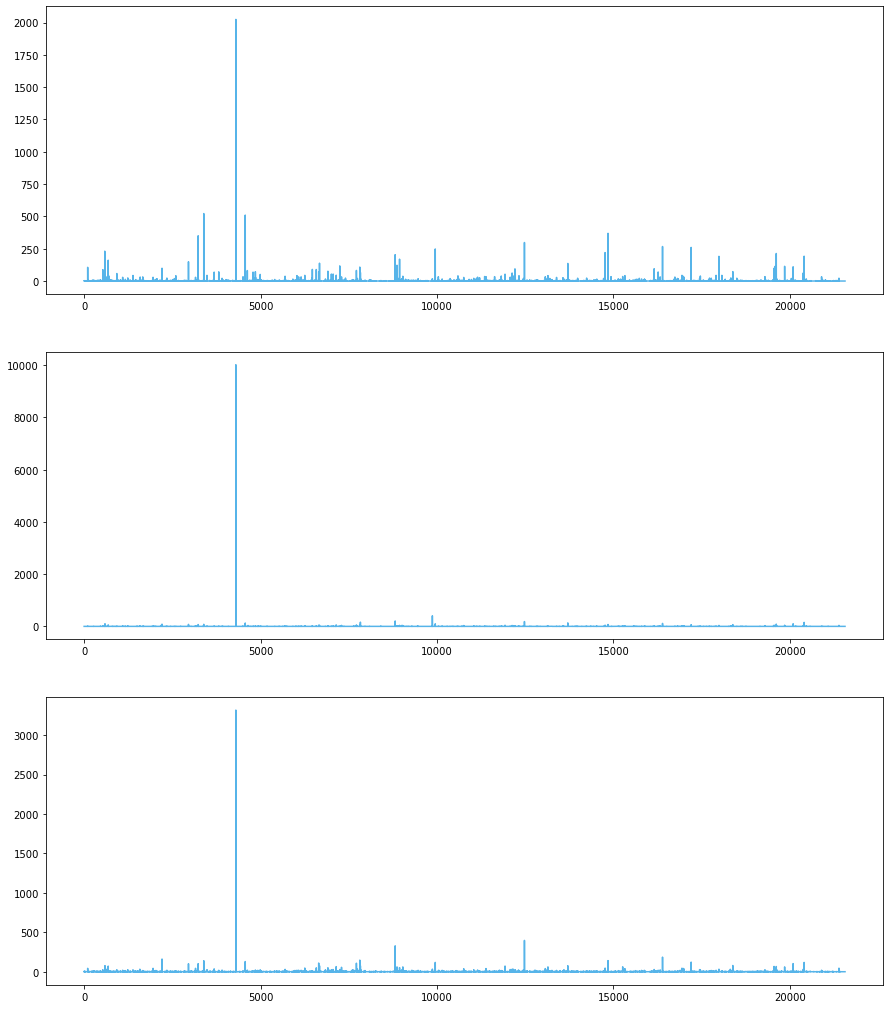

In [78]:
four_names = ["20210513-ITP-4cell-cross-50-B", "20210513-ITP-4cell-cross-50-C",
              "20210513-ITP-4cell-cross-50-D"]

#fig, axs = plt.subplots(1,4)
plt.rcParams['figure.figsize'] = [15, 18]

fig, ax = plt.subplots(3, 1)

for i, exp_name in enumerate(four_names):
    
    utr3_counts = list(utr3_trans_total_region_counts[exp_name])

    ax[i].plot(utr3_counts, color = colors[1]);

In [77]:
for i, exp_name in enumerate(four_names):
    
    utr3_counts = list(utr3_trans_total_region_counts[exp_name])
    
    f_df = utr3_trans_total_region_counts[exp_name][ utr3_trans_total_region_counts[exp_name] > 200 ]
    
    print(f_df)

transcript
Rnf152-201         231
Bcl2-201           217
Mbnl1-201          350
Syt11-203          522
Tmem38b-201       2024
Tceanc2-202        510
Vmn2r79-201        204
Klkb1-201          248
D10Wsu102e-201     298
Zbtb1-201          220
Syndig1l-201       369
Rpgrip1-202        267
Grap2-201          260
Pde6a-201          213
Name: 20210513-ITP-4cell-cross-50-B, dtype: uint32
transcript
Tmem38b-201    10018
Vmn2r79-201      207
Fnta-201         404
Name: 20210513-ITP-4cell-cross-50-C, dtype: uint32
transcript
Tmem38b-201       3317
Vmn2r79-201        328
D10Wsu102e-201     397
Name: 20210513-ITP-4cell-cross-50-D, dtype: uint32


## 2 Cells

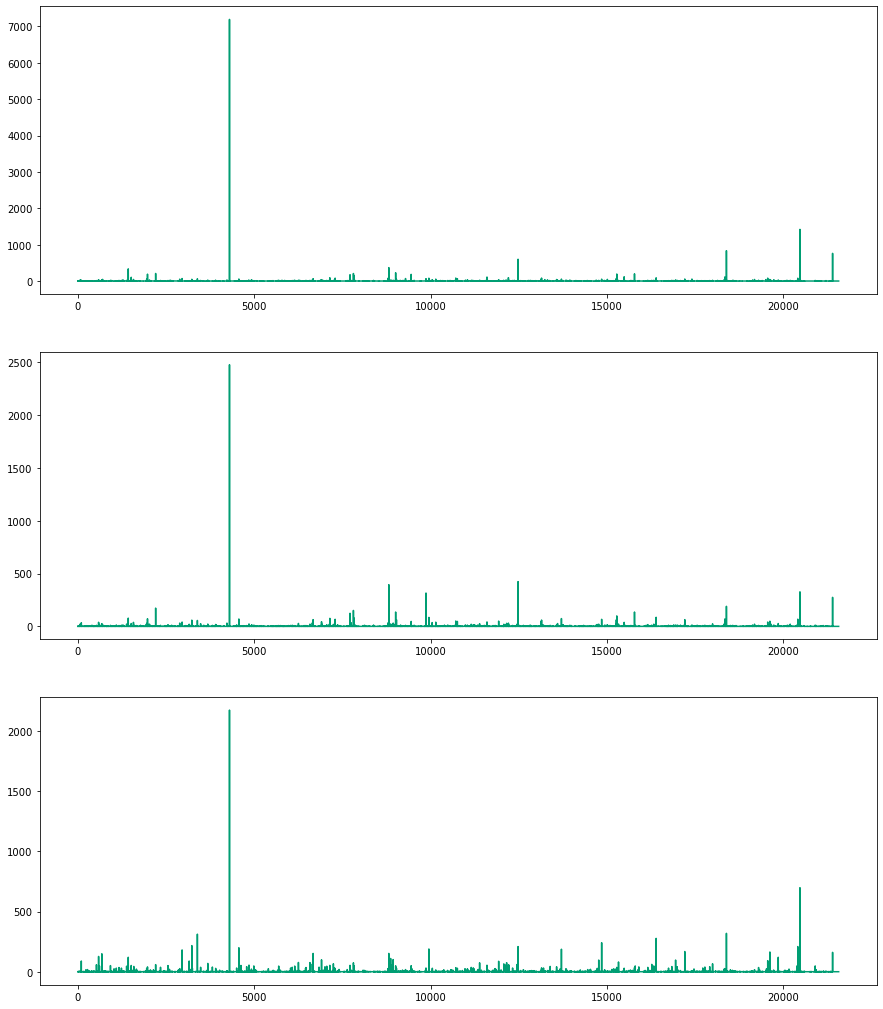

In [79]:
two_names = ["20210513-ITP-2cell-cross-50-B", "20210513-ITP-2cell-cross-50-C", "20210513-ITP-2cell-cross-50-F"]

#fig, axs = plt.subplots(1,4)
plt.rcParams['figure.figsize'] = [15, 18]

fig, ax = plt.subplots(3, 1)

for i, exp_name in enumerate(two_names):
    
    utr3_counts = list(utr3_trans_total_region_counts[exp_name])

    ax[i].plot(utr3_counts, color = colors[3]);

In [82]:
for i, exp_name in enumerate(two_names):
    
    utr3_counts = list(utr3_trans_total_region_counts[exp_name])
    
    f_df = utr3_trans_total_region_counts[exp_name][ utr3_trans_total_region_counts[exp_name] > 300 ]
    
    print(f_df)

transcript
Mrps2-201          334
Tmem38b-201       7193
Vmn2r79-201        369
D10Wsu102e-201     599
Vmn2r114-201       834
Gm7102-201        1420
Kdm5d-201          761
Name: 20210513-ITP-2cell-cross-50-B, dtype: uint32
transcript
Tmem38b-201       2478
Vmn2r79-201        395
Fnta-201           316
D10Wsu102e-201     424
Gm7102-201         327
Name: 20210513-ITP-2cell-cross-50-C, dtype: uint32
transcript
Syt11-203        312
Tmem38b-201     2174
Vmn2r114-201     319
Gm7102-201       698
Name: 20210513-ITP-2cell-cross-50-F, dtype: uint32


## One Cell

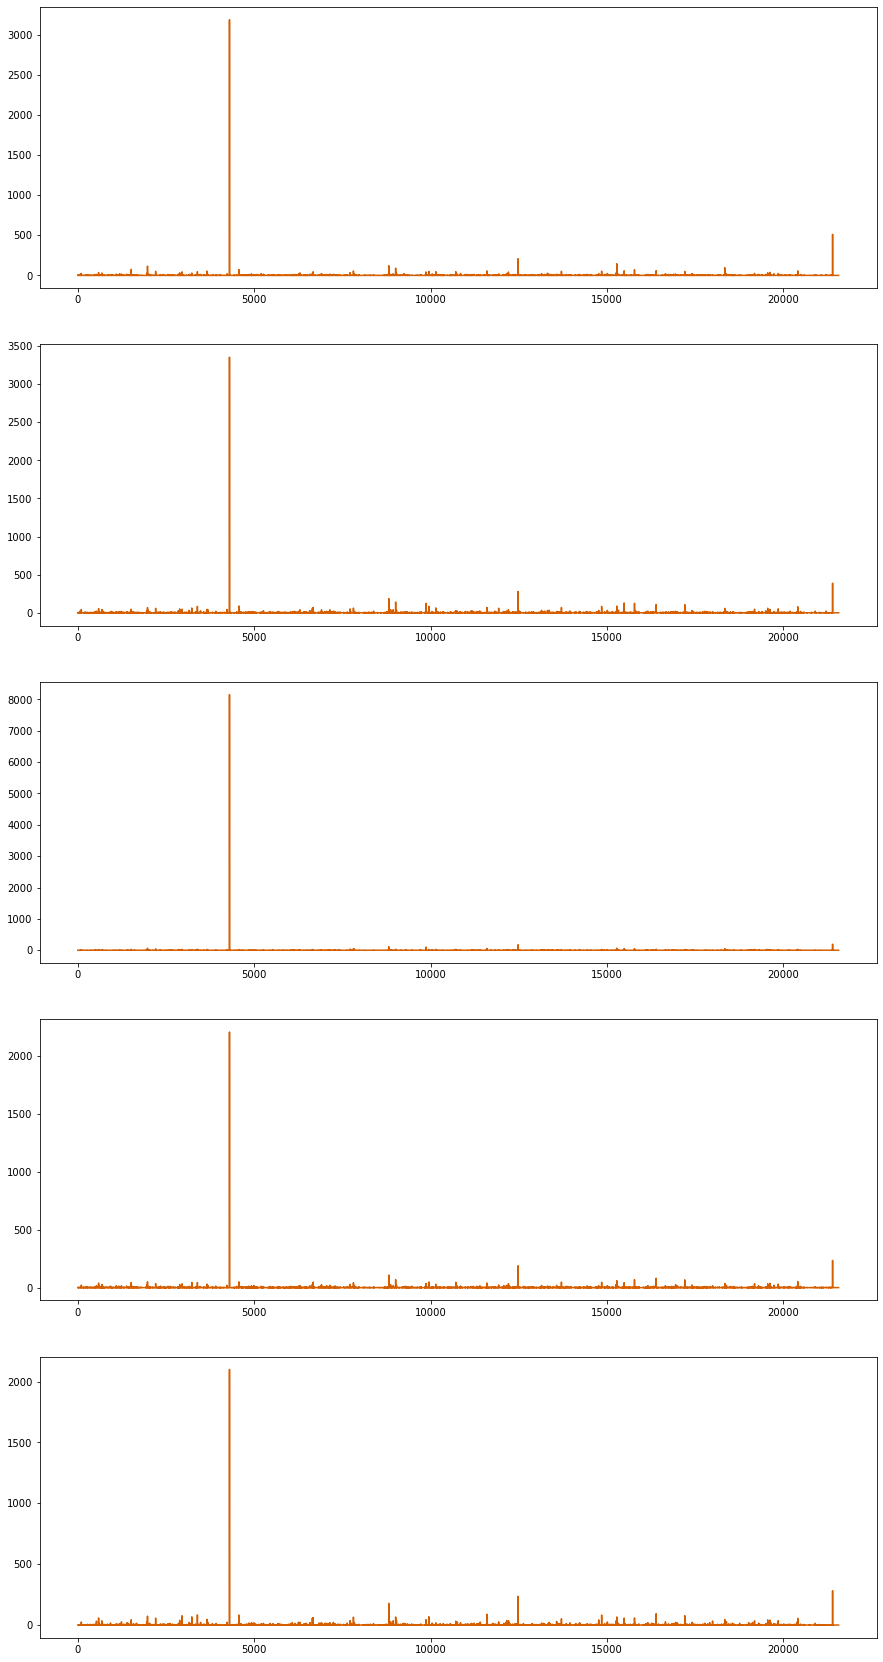

In [83]:
one_names = ["20210513-ITP-1cell-cross-50-A", "20210513-ITP-1cell-cross-50-B", "20210513-ITP-1cell-cross-50-C",
             "20210513-ITP-1cell-cross-50-D", "20210513-ITP-1cell-cross-50-E"]

#fig, axs = plt.subplots(1,4)
plt.rcParams['figure.figsize'] = [15, 30]

fig, ax = plt.subplots(5, 1)

for i, exp_name in enumerate(one_names):
    
    utr3_counts = list(utr3_trans_total_region_counts[exp_name])

    ax[i].plot(utr3_counts, color = colors[4]);

In [84]:
for i, exp_name in enumerate(one_names):
    
    utr3_counts = list(utr3_trans_total_region_counts[exp_name])
    
    f_df = utr3_trans_total_region_counts[exp_name][ utr3_trans_total_region_counts[exp_name] > 200 ]
    
    print(f_df)

transcript
Tmem38b-201       3185
D10Wsu102e-201     208
Kdm5d-201          512
Name: 20210513-ITP-1cell-cross-50-A, dtype: uint32
transcript
Tmem38b-201       3354
D10Wsu102e-201     280
Kdm5d-201          388
Name: 20210513-ITP-1cell-cross-50-B, dtype: uint32
transcript
Tmem38b-201    8153
Name: 20210513-ITP-1cell-cross-50-C, dtype: uint32
transcript
Tmem38b-201    2210
Kdm5d-201       235
Name: 20210513-ITP-1cell-cross-50-D, dtype: uint32
transcript
Tmem38b-201       2100
D10Wsu102e-201     236
Kdm5d-201          281
Name: 20210513-ITP-1cell-cross-50-E, dtype: uint32


----------------------------------

------------------------------------

In [ ]:
from ribopy.core.get_gadgets import get_region_boundaries

In [89]:
def rename(x):
    return x.split("|")[4]


def get_coverage(ribo, 
                 experiment,
                 range_lower = 0,
                 range_upper = 0,
                 alias       = False,
                 multiplier  = 1):
    """
    NOTE THAT THIS FUNCTION RETURNS A TUPLE!!!
    
    Returns a pair: (dataframe, coverage_dict)
    
    In the dataframe, the last column 
    has the coverage density of a given transcript.
    The normalized covarage is defined by
    (#total_reads / #transcript_length) * 1000000
    
    coverage_dict: This is the output of the function "get_coverage"
    of the ribo object. It contains the coverage values of each gene 
    at nucleotide resolution.

    """
    
    coverage_dict = ribo.get_coverage(experiment  = experiment,
                                      range_lower = range_lower, 
                                      range_upper = range_upper,
                                      alias       = alias)
    
    region_boundaries = get_region_boundaries(ribo._handle)
    
    transcript_names     = coverage_dict.keys()
    transcript_coverages = coverage_dict.values()
    transcript_total     = tuple( map( np.sum, transcript_coverages ) )
    transcript_lengths   = tuple( map(len, transcript_coverages) )
    normalized_coverage  = np.divide(transcript_total , transcript_lengths) * multiplier
    start_sites          = tuple( map( lambda x: x[1][0], region_boundaries ) )
    stop_sites           = tuple( map( lambda x: x[1][1], region_boundaries ) )
    
    # We also add normalized cds coverage
    cds_data = zip( start_sites, stop_sites, transcript_coverages )
    norm_cds = tuple( map( lambda x:  
                              (np.sum( x[2][x[0]:x[1]] ) / (x[1] - x[0]) )* multiplier,
                      cds_data) )
    
    result = pd.DataFrame(data = { "total"     :  transcript_total, 
                                   "length"    :  transcript_lengths,
                                   "cds_start" :  start_sites,
                                   "cds_stop"  :  stop_sites,
                                   "norm_cds"  :  norm_cds,
                                   "norm_cov"  :  normalized_coverage}, 
                          index = transcript_names) 
    
    return( (result, coverage_dict))

In [94]:
coverages = { e: get_coverage(
                     ribo        = myribo, 
                     experiment  = e,
                     range_lower = LENGTH_MIN,
                     range_upper = LENGTH_MAX,
                     alias       = rename)\
                 for e in one_names + two_names + four_names + eight_names }

In [120]:
experiment_name = "20210513-ITP-1cell-cross-50-A"
gene_name       = "Tmem38b-201"
title           = gene_name




def plot_gene(experiment_name, gene_name):
    gene_coverage = coverages[experiment_name][1][gene_name]

    cds_start = coverages[experiment_name][0].loc[gene_name]["cds_start"]
    cds_end   = coverages[experiment_name][0].loc[gene_name]["cds_stop"]

    fig, ax = plt.subplots()
    plt.rcParams['figure.figsize'] = [15, 5]
    plt.plot(gene_coverage, color = '#D55E00')
    plt.title(gene_name)
    ax.fill_between([cds_start, cds_end], y1 = max( gene_coverage ), alpha = 0.2);
    return fig

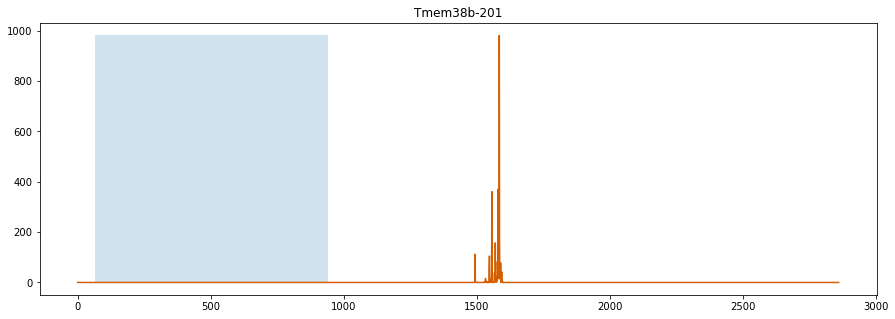

In [121]:
plot_gene(experiment_name = "20210513-ITP-1cell-cross-50-A", gene_name = "Tmem38b-201");

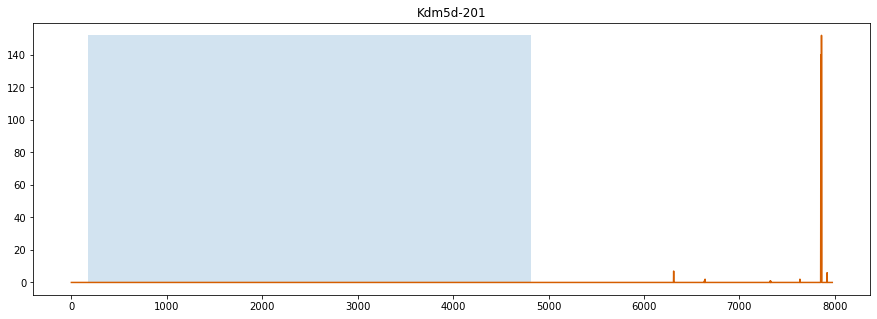

In [122]:
plot_gene(experiment_name = "20210513-ITP-1cell-cross-50-A", gene_name = "Kdm5d-201");

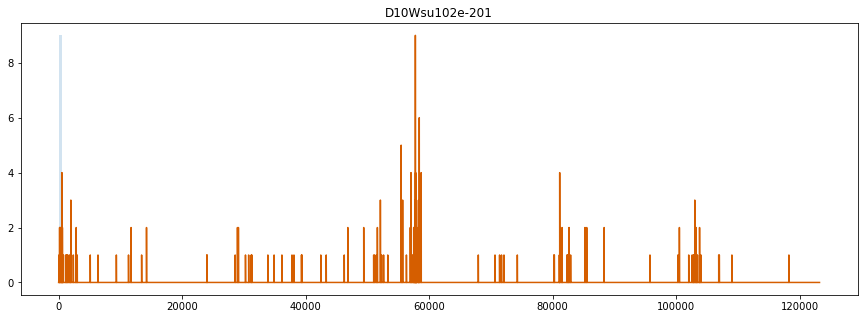

In [123]:
plot_gene(experiment_name = "20210513-ITP-1cell-cross-50-A", gene_name = "D10Wsu102e-201");

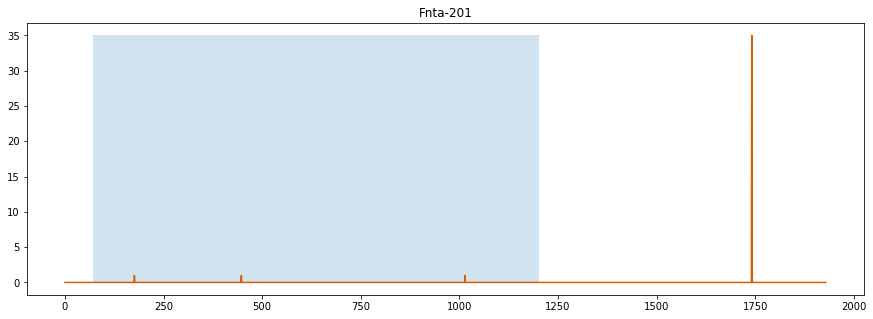

In [125]:
plot_gene(experiment_name = "20210513-ITP-8cell-cross-50-A", gene_name = "Fnta-201");

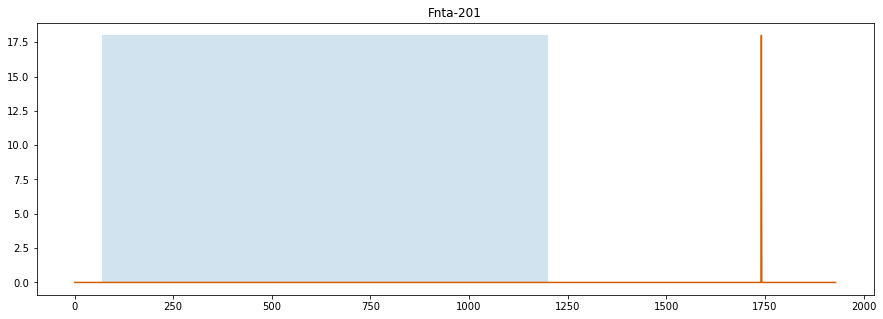

In [127]:
plot_gene(experiment_name = "20210513-ITP-4cell-cross-50-B", gene_name = "Fnta-201");

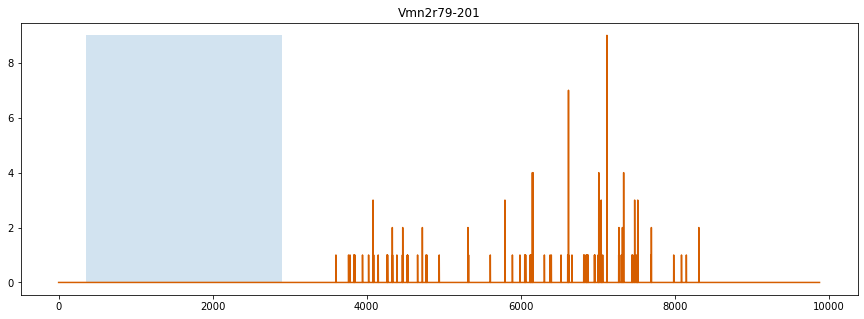

In [128]:
plot_gene(experiment_name = "20210513-ITP-8cell-cross-50-A", gene_name = "Vmn2r79-201");

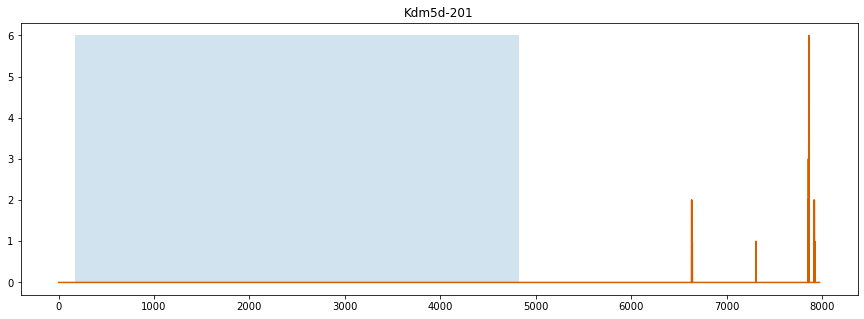

In [129]:
plot_gene(experiment_name = "20210513-ITP-8cell-cross-50-A", gene_name = "Kdm5d-201");

In [ ]:
plot_gene(experiment_name = "20210513-ITP-1cell-cross-50-A", gene_name = "");

In [ ]:
plot_gene(experiment_name = "20210513-ITP-1cell-cross-50-A", gene_name = "");

## What happens to the CDS percentage when we exclude these transcripts?

In [219]:
def get_percentages(myribo, excluded_transcripts = []):
    """
    Returns CDS percentages after excluding the given set of genes
    """

    get_generic_region_counts = partial(myribo.get_region_counts, 
                                          experiments    = cross_exps,
                                          range_lower    = LENGTH_MIN,
                                          range_upper    = LENGTH_MAX,
                                          alias          = True,
                                          sum_lengths    = True,
                                          sum_references = False)

    cds_total_region_counts  = get_generic_region_counts(region_name    = "CDS")
    utr3_total_region_counts = get_generic_region_counts(region_name    = "UTR3")
    utr5_total_region_counts = get_generic_region_counts(region_name    = "UTR5")

    selected_transcripts     = list(set( cds_total_region_counts.index ) - set(excluded_transcripts) )
    filtered_cds_df          = cds_total_region_counts.filter(selected_transcripts, axis = 0)

    cds_sums = filtered_cds_df.sum(axis = 0)

    filtered_utr3_df          = utr3_total_region_counts.filter(selected_transcripts, axis = 0)
    utr3_sums = filtered_utr3_df.sum(axis = 0)

    filtered_utr5_df          = utr5_total_region_counts.filter(selected_transcripts, axis = 0)
    utr5_sums = filtered_utr5_df.sum(axis = 0)

    total_counts = cds_sums + utr3_sums + utr5_sums

    cds_percentages = (cds_sums / total_counts ) * 100
    return cds_percentages
    
    

### Initial Percentages

In [220]:
initial_percentages = get_percentages(myribo, excluded_transcripts = [])
initial_percentages

20210513-ITP-1cell-cross-50-A    75.027068
20210513-ITP-1cell-cross-50-B    75.230199
20210513-ITP-1cell-cross-50-C    66.215106
20210513-ITP-1cell-cross-50-D    77.876025
20210513-ITP-1cell-cross-50-E    74.276301
20210513-ITP-2cell-cross-50-B    65.747913
20210513-ITP-2cell-cross-50-C    65.678861
20210513-ITP-2cell-cross-50-F    65.081767
20210513-ITP-4cell-cross-50-B    68.909988
20210513-ITP-4cell-cross-50-C    61.499536
20210513-ITP-4cell-cross-50-D    75.578815
20210513-ITP-8cell-cross-50-A    81.998084
20210513-ITP-8cell-cross-50-B    79.416385
20210513-ITP-8cell-cross-50-C    82.036807
20210513-ITP-8cell-cross-50-D    76.000941
dtype: float64

### Percentages After Removing Tmem8

In [221]:
tmem8_excluded_percentages = get_percentages(myribo, excluded_transcripts = ["Tmem38b-201"])
tmem8_excluded_percentages

20210513-ITP-1cell-cross-50-A    78.500316
20210513-ITP-1cell-cross-50-B    78.122026
20210513-ITP-1cell-cross-50-C    77.769978
20210513-ITP-1cell-cross-50-D    80.633240
20210513-ITP-1cell-cross-50-E    76.469980
20210513-ITP-2cell-cross-50-B    70.254741
20210513-ITP-2cell-cross-50-C    68.804012
20210513-ITP-2cell-cross-50-F    66.765168
20210513-ITP-4cell-cross-50-B    71.076078
20210513-ITP-4cell-cross-50-C    72.231957
20210513-ITP-4cell-cross-50-D    78.425101
20210513-ITP-8cell-cross-50-A    85.449976
20210513-ITP-8cell-cross-50-B    86.918422
20210513-ITP-8cell-cross-50-C    85.984349
20210513-ITP-8cell-cross-50-D    81.396594
dtype: float64

In [222]:
tmem8_excluded_percentages - initial_percentages

20210513-ITP-1cell-cross-50-A     3.473248
20210513-ITP-1cell-cross-50-B     2.891827
20210513-ITP-1cell-cross-50-C    11.554872
20210513-ITP-1cell-cross-50-D     2.757216
20210513-ITP-1cell-cross-50-E     2.193679
20210513-ITP-2cell-cross-50-B     4.506828
20210513-ITP-2cell-cross-50-C     3.125152
20210513-ITP-2cell-cross-50-F     1.683401
20210513-ITP-4cell-cross-50-B     2.166090
20210513-ITP-4cell-cross-50-C    10.732421
20210513-ITP-4cell-cross-50-D     2.846286
20210513-ITP-8cell-cross-50-A     3.451892
20210513-ITP-8cell-cross-50-B     7.502037
20210513-ITP-8cell-cross-50-C     3.947543
20210513-ITP-8cell-cross-50-D     5.395653
dtype: float64

In [244]:
more_excluded_percentages = get_percentages(myribo, excluded_transcripts = ["Tmem38b-201", 
                                                                            "Kdm5d-201", 
                                                                            "Fnta-201", 
                                                                            "D10Wsu102e-201",
                                                                            "Gm7102-201"])
more_excluded_percentages

20210513-ITP-1cell-cross-50-A    79.075335
20210513-ITP-1cell-cross-50-B    78.514895
20210513-ITP-1cell-cross-50-C    78.112231
20210513-ITP-1cell-cross-50-D    80.917493
20210513-ITP-1cell-cross-50-E    76.776217
20210513-ITP-2cell-cross-50-B    72.087973
20210513-ITP-2cell-cross-50-C    69.965736
20210513-ITP-2cell-cross-50-F    67.743650
20210513-ITP-4cell-cross-50-B    71.331663
20210513-ITP-4cell-cross-50-C    72.454507
20210513-ITP-4cell-cross-50-D    78.710257
20210513-ITP-8cell-cross-50-A    85.652003
20210513-ITP-8cell-cross-50-B    87.107479
20210513-ITP-8cell-cross-50-C    86.246264
20210513-ITP-8cell-cross-50-D    81.625564
dtype: float64

In [245]:
more_excluded_percentages - tmem8_excluded_percentages

20210513-ITP-1cell-cross-50-A    0.575019
20210513-ITP-1cell-cross-50-B    0.392869
20210513-ITP-1cell-cross-50-C    0.342254
20210513-ITP-1cell-cross-50-D    0.284252
20210513-ITP-1cell-cross-50-E    0.306237
20210513-ITP-2cell-cross-50-B    1.833231
20210513-ITP-2cell-cross-50-C    1.161724
20210513-ITP-2cell-cross-50-F    0.978482
20210513-ITP-4cell-cross-50-B    0.255585
20210513-ITP-4cell-cross-50-C    0.222550
20210513-ITP-4cell-cross-50-D    0.285157
20210513-ITP-8cell-cross-50-A    0.202027
20210513-ITP-8cell-cross-50-B    0.189057
20210513-ITP-8cell-cross-50-C    0.261915
20210513-ITP-8cell-cross-50-D    0.228971
dtype: float64

## Decision

We decided to exclude the noncoding RNA that partially overlaps with the 3' UTR of Tmem38b only. 

Removing other transcripts increased the CDS percentage less than 1% most of th time.

We have the following gene that intersects with Tmem38b:

>ENSMUST00000083953.1 (n-R5s185) length=119
GTCTACAGCCATACCACCCTGAACACGCCCGATCTTGTCTGATCTCTGGAGCTAAGCAGG
GTCGGGCCTGGTTAGTACTTGGATGGGAGACCGCCTGGGAATACCGGGTGCTGTAGGCT

Let's make sure that the peak in Tmem38b overlaps with the sequences above. For this, first we find the position of the above non-coding RNA sequence.

In [225]:
import gzip

class FastaEntry:
    '''
    Given a header and a sequence, creates a fasta entry.
    The string representation of the fasta entry consists
    of 50 nts per line.
    Do not change the chunk size (= 50)
    TODO : Consider making header and sequence properties
    Also consider putting more checks here for the input
    '''
    def __init__(self , header , sequence ):
        self.header   = header
        self.sequence = sequence

    def reverse_complement(self):
        complements = {"A" : "T" , "a" : "t" ,
                   "C" : "G" , "c" : "g" ,
                   "G" : "C" , "g" : "c" ,
                   "T" : "A" , "t" : "a" ,
                   "N" : "N" , "n" : "n"}
        result = list()

        for i in range(len(self.sequence) - 1 , -1 , -1 ):
            try:
                result.append(complements[self.sequence[i]])
            except IndexError:
                error_message = "Invalid character (%s) in the fasta sequence with header \n" \
                                "%s"%(self.sequence[i] , self.header)
                raise IOError(error_message)
        self.sequence = "".join(result)


    def __str__(self ):
        chunk_size                  = 50 # Do not change this!
        result_list                 = [ '>' +  self.header ]
        sequence_size               = len(self.sequence)
        number_of_remaining_letters = sequence_size
        number_of_processed_letters = 0

        while number_of_remaining_letters > 0:
            if number_of_remaining_letters <= chunk_size:
                result_list.append(self.sequence[ number_of_processed_letters : ])
                number_of_remaining_letters = 0
                number_of_processed_letters = sequence_size
            else:
                new_number_of_processed_letters = number_of_processed_letters + chunk_size
                result_list.append(self.sequence[ number_of_processed_letters : new_number_of_processed_letters])
                number_of_remaining_letters -= chunk_size
                number_of_processed_letters  = new_number_of_processed_letters

        return("\n".join( result_list ) )

############################################################################################


class FastaFile:
    '''
    This object is used to read fasta files into FastaEntry objects.
    For writing fasta files, we only need FastaEntry objects and using
    their str function, we can convert them to string and write to files.
    Note that it can be used as a context manager as well.
    '''

    def __init__(self , file):
        myopen = open
        if file.endswith(".gz"):
            myopen = gzip.open

        if(file):
            self.f = myopen(file , "rt")
        else:
            self.f = stdin

        self.current_header = ""
        self.current_sequence = list()

    #####################################################

    def __enter__(self):
        return self

    #####################################################

    def __exit__(self, exc_type, exc_val, exc_tb):
        pass


    ######################################################

    def __getitem__(self, index):

        for raw_line in self.f:
            line = raw_line.strip()
            if not line:
                continue

            if line[0] == ">":
                if not self.current_header:
                    self.current_header = (line[1:].split())[0]
                    self.current_sequence = list()
                else:
                    this_entry = FastaEntry(header = self.current_header , sequence = "".join(self.current_sequence) )
                    self.current_header = (line[1:].split())[0]
                    self.current_sequence = list()
                    return(this_entry)
            else:
                self.current_sequence.append(line)

        # this returns the last entry
        if len(self.current_sequence) > 0:
            this_entry = FastaEntry(header = self.current_header , sequence = "".join(self.current_sequence) )
            self.current_sequence = list()
            return(this_entry)

        raise IndexError

    #########################################################

    def __del__(self):
        self.f.close()

In [234]:
fasta_file = "/data/projects/repos/mouse_reference/transcriptome/mouse/v2/riboflow_annot_and_ref/appris_mouse_v2_selected.fa.gz"


In [237]:
myfasta = FastaFile(fasta_file)

header, sequence = "", ""

for e in myfasta:
    if e.header.lower().find("tmem38b-201") > -1:
        header   = e.header
        sequence = e.sequence
        
print(header)

ENSMUST00000030127.12|ENSMUSG00000028420.13|OTTMUSG00000007005.3|OTTMUST00000016196.1|Tmem38b-201|Tmem38b|2862|UTR5:1-64|CDS:65-943|UTR3:944-2862|


Now we find the relative position of the rrna sequence in Tmem38b

In [238]:
rrna_sequence = "GTCTACAGCCATACCACCCTGAACACGCCCGATCTTGTCTGATCTCTGGAGCTAAGCAGGGTCGGGCCTGGTTAGTACTTGGATGGGAGACCGCCTGGGAATACCGGGTGCTGTAGGCT"

rrna_start_position = sequence.find(rrna_sequence)
rrna_end_position   = rrna_start_position + len(rrna_sequence)

print("The start / end positions of the rrna sequence are: ", rrna_start_position, rrna_end_position)

The start / end positions of the rrna sequence are:  1494 1613


Next we color the positions to make sure they match the peak:

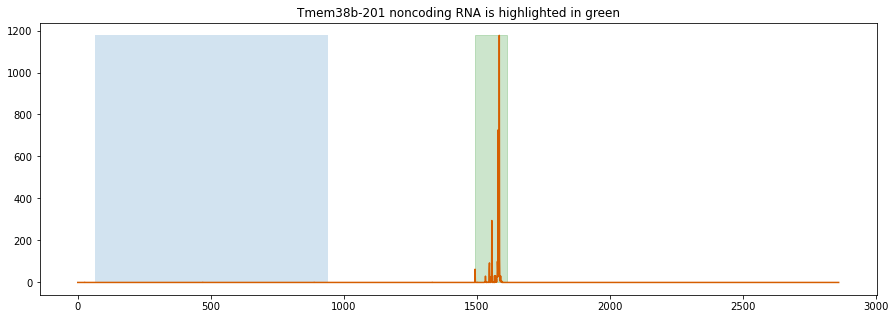

In [243]:
experiment_name = "20210513-ITP-1cell-cross-50-B"
gene_name = "Tmem38b-201"


gene_coverage = coverages[experiment_name][1][gene_name]

cds_start = coverages[experiment_name][0].loc[gene_name]["cds_start"]
cds_end   = coverages[experiment_name][0].loc[gene_name]["cds_stop"]

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(gene_coverage, color = '#D55E00')
plt.title(gene_name + " noncoding RNA is highlighted in green")
ax.fill_between([cds_start, cds_end], y1 = max( gene_coverage ), alpha = 0.2);

ax.fill_between([rrna_start_position, rrna_end_position], y1 = max( gene_coverage ), alpha = 0.2, color = "green")
plt.savefig("tmem38b_1cell-cross_b.pdf")

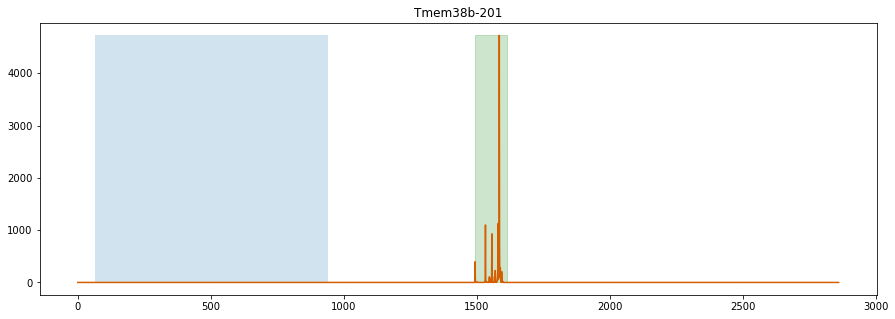

In [242]:
experiment_name = "20210513-ITP-8cell-cross-50-B"
gene_name = "Tmem38b-201"


gene_coverage = coverages[experiment_name][1][gene_name]

cds_start = coverages[experiment_name][0].loc[gene_name]["cds_start"]
cds_end   = coverages[experiment_name][0].loc[gene_name]["cds_stop"]

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(gene_coverage, color = '#D55E00')
plt.title(gene_name)
ax.fill_between([cds_start, cds_end], y1 = max( gene_coverage ), alpha = 0.2);

ax.fill_between([rrna_start_position , rrna_end_position ], y1 = max( gene_coverage ), alpha = 0.2, color = "green");

## Important Update:

We observed that the sequence we obtained from UCSC is not the complete sequence of this noncoding RNA. So, we added 20 nucleotides to either end of the sequence. 

Also we realized that this RNA (ENSMUST00000083953.1 (n-R5s185) ) contains a SNP. So we included that SNP as well. For that, we simply read the masked fasta file of the transcriptome and obtained the sequence as follows:

In [ ]:
sequence[rrna_start_position-20:rrna_end_position+20]

# Should return 
# CATTAAAAATACCTGAAATTGTCTACAGCCATACCACCCTGAACACGCCCGATCTTGTCTGATCTCTGGAGCTAAGCAGGGTCGGGCCTGGTTAGTACTTGGATGGGAGACNGCCTGGGAATACCGGGTGCTGTAGGCTTGAAAAAAAAAACCTGAAAT